In [35]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
logs_raw = json.load(open('logs.json'))

In [38]:
print('Nombre des éléments de la liste: ' + str(len(logs_raw)))

Nombre des éléments de la liste: 240060


In [4]:
print('Chaque éléments de la liste est de type: ' + str(type(logs_raw[0])) + ', et contient les éléments suivants: \n')
print(list(logs_raw[0].keys()))

Chaque éléments de la liste est de type: <class 'dict'>, et contient les éléments suivants: 

['at', 'context', 'conclusion', 'diag', 'from', 'instance-id', 'instance-name', 'uid', 'user-instance', 'version']


In [5]:
logs_raw[0]

{'at': '2018-07-26T10:17:36-07:00',
 'context': {'timezone': 'UTC'},
 'conclusion': {'_text': 'casablanca',
  'outcomes': [{'_text': 'casablanca',
    'confidence': None,
    'intent-id': 'default_intent_id',
    'intent': 'default_intent',
    'entities': [{'wisp': '53679cd0-314c-499a-915c-d0879ffc028d',
      'name': 'location',
      'value': {'value': 'casablanca', 'type': 'value'},
      'confidence': 0.93602,
      'body': 'casablanca',
      'start': 0,
      'end': 10}]}]},
 'diag': {'_text': 'casablanca',
  'outcomes': [{'_text': 'casablanca',
    'confidence': None,
    'intent-id': 'default_intent_id',
    'intent': 'default_intent',
    'entities': {'location': [{'value': {'value': 'casablanca',
        'type': 'value'},
       'confidence': 0.93602,
       'body': 'casablanca',
       'start': 0,
       'end': 10,
       'entity': 'location'}]}}]},
 'from': 'msg',
 'instance-id': '5b5892d0-f12f-44e0-a9d3-efb5ece2f0d6',
 'instance-name': 'flybot-refactor',
 'uid': 'github:1


On s'intéresse à **elements['diag']['outcomes']** qui contient les textes reçus et les entités/intent extraits


In [6]:
logs_raw[0]['diag']['outcomes']

[{'_text': 'casablanca',
  'confidence': None,
  'intent-id': 'default_intent_id',
  'intent': 'default_intent',
  'entities': {'location': [{'value': {'value': 'casablanca', 'type': 'value'},
     'confidence': 0.93602,
     'body': 'casablanca',
     'start': 0,
     'end': 10,
     'entity': 'location'}]}}]

In [7]:
# all texts sent in a list
all_texts = []
for e in logs_raw:
    all_texts.append(e['diag']['outcomes'][0]['_text'])    

In [8]:
len(all_texts)

240060

In [9]:
texts_len_aux = []
for e in all_texts:
    texts_len_aux.append(len(e))

In [10]:
df_len = pd.DataFrame(texts_len_aux, columns=['text length'])
df_len.describe()

,text length
count,240060.000000
mean,9.065305
std,12.267178
min,1.000000
25%,3.000000
50%,7.000000
75%,10.000000
max,280.000000


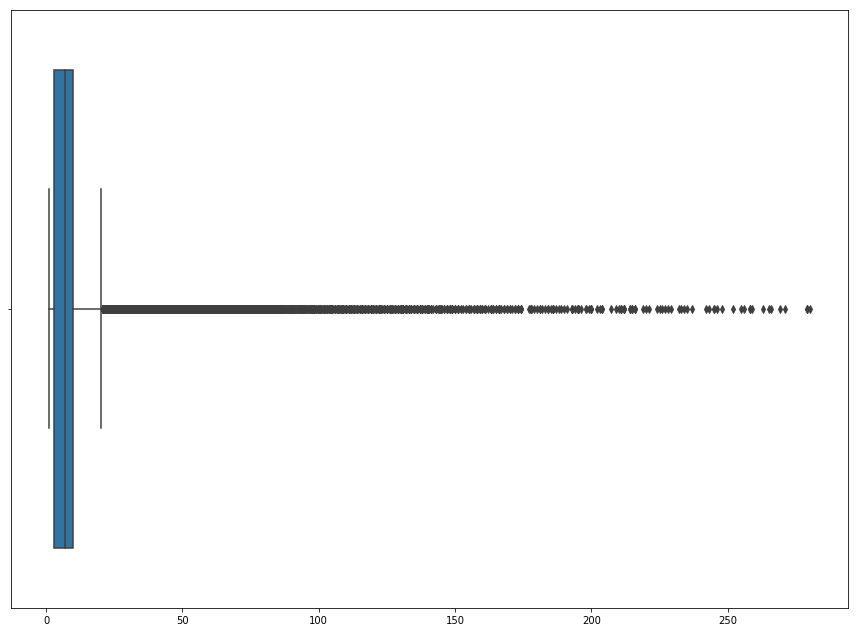

In [11]:
plt.figure(figsize=(15,11))
sns.boxplot(texts_len_aux);

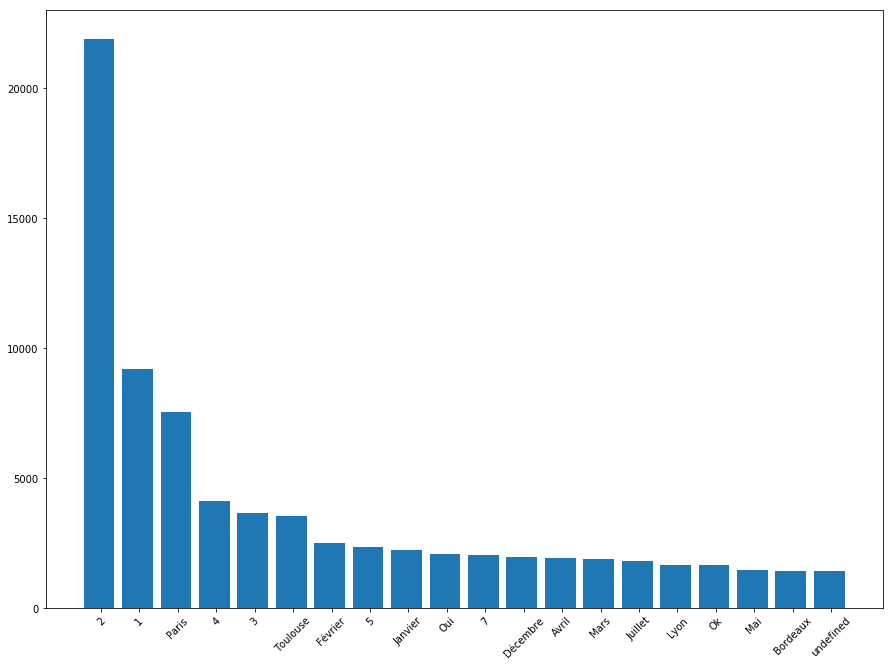

In [12]:
from collections import Counter

counts = dict(Counter(all_texts).most_common(20))
labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.05

plt.figure(figsize=(15,11))
plt.bar(indexes, values)

# add labels

plt.xticks(indexes + bar_width, labels, rotation=45)
plt.show()

In [13]:
df1 = pd.DataFrame(labels, columns=['most common'])
df2 = pd.DataFrame(values, columns=['occurence'])
df3 = pd.DataFrame(values/len(all_texts)*100, columns=['% occurence'])
df = pd.concat([df1,df2,df3], axis=1)

In [14]:
df

,most common,occurence,% occurence
0,2,21911,9.127302
1,1,9210,3.836541
2,Paris,7546,3.143381
3,4,4120,1.716238
4,3,3682,1.533783
5,Toulouse,3531,1.470882
6,Février,2499,1.040990
7,5,2366,0.985587
8,Janvier,2240,0.933100
9,Oui,2087,0.869366


In [15]:
# Long texts (> 70 characters only) 

long_texts = []
for e in logs_raw:
    if len(e['diag']['outcomes'][0]['_text'])>50:
        long_texts.append(e['diag']['outcomes'])
        
print("Nombre de messages dont la taille est supérieure à 50 caractères: " + str(len(long_texts)))

Nombre de messages dont la taille est supérieure à 50 caractères: 3771


In [16]:
long_texts = [e for elm in long_texts for e in elm]

In [17]:
indexes = []
entities_value = []
entities_body = []
entities_confidence = []

#long_texts.remove(long_texts[1834])
#long_texts.remove(long_texts[2707])



for e in long_texts:
    if e['entities'] != []:
        for ent in e['entities'].keys():
            try:
                indexes.append(long_texts.index(e))
                entities_value.append(ent)
                entities_body.append(e['entities'][ent][0]['body'])
                entities_confidence.append(e['entities'][ent][0]['confidence'])
            except:
                print('error in index ' + str(long_texts.index(e)))




error in index 1834
error in index 2708


In [18]:
df_ind = pd.DataFrame(indexes, columns=['msg index'])
df_val = pd.DataFrame(entities_value, columns=['entity value'])
df_body = pd.DataFrame(entities_body, columns=['entity body'])
df_conf = pd.DataFrame(entities_confidence, columns=['confidence'])
df_all = pd.concat([df_ind,df_body,df_val,df_conf], axis=1)

In [19]:
df_all.head(10)

,msg index,entity body,entity value,confidence
0,0,aller simple,search_type,0.960731
1,0,toulouse,origin,0.969255
2,0,1,passenger,0.963311
3,0,demain,datetime,0.961905
4,1,toulouse,origin,0.966155
5,1,1,passenger,0.965268
6,1,demain,datetime,0.921030
7,2,demain,departure_date,0.814150
8,2,10h,datetime,0.964115
9,2,dimanche soir,return_date,0.726135


In [20]:
# To check the message corresponding to msg_index: change value of msg_index and run this cell
msg_index = 100
long_texts[msg_index]

{'_text': 'Partir de Toulouse le 13 octobre pour le Japon et revenir le 19 octobre',
 'confidence': None,
 'intent-id': 'default_intent_id',
 'intent': 'default_intent',
 'entities': {'origin': [{'value': {'value': 'Toulouse', 'type': 'value'},
    'confidence': 0.99388533901262,
    'role': 'origin',
    'body': 'Toulouse',
    'start': 10,
    'end': 18,
    'entity': 'location'}],
  'departure_date': [{'value': {'values': [{'value': '2018-10-13T00:00:00.000+00:00',
       'grain': 'day',
       'type': 'value'},
      {'value': '2019-10-13T00:00:00.000+00:00',
       'grain': 'day',
       'type': 'value'},
      {'value': '2020-10-13T00:00:00.000+00:00',
       'grain': 'day',
       'type': 'value'}],
     'value': '2018-10-13T00:00:00.000+00:00',
     'grain': 'day',
     'type': 'value'},
    'confidence': 0.98564546463386,
    'role': 'departure_date',
    'body': 'le 13 octobre',
    'start': 19,
    'end': 32,
    'entity': 'datetime'}],
  'return_date': [{'value': {'values':

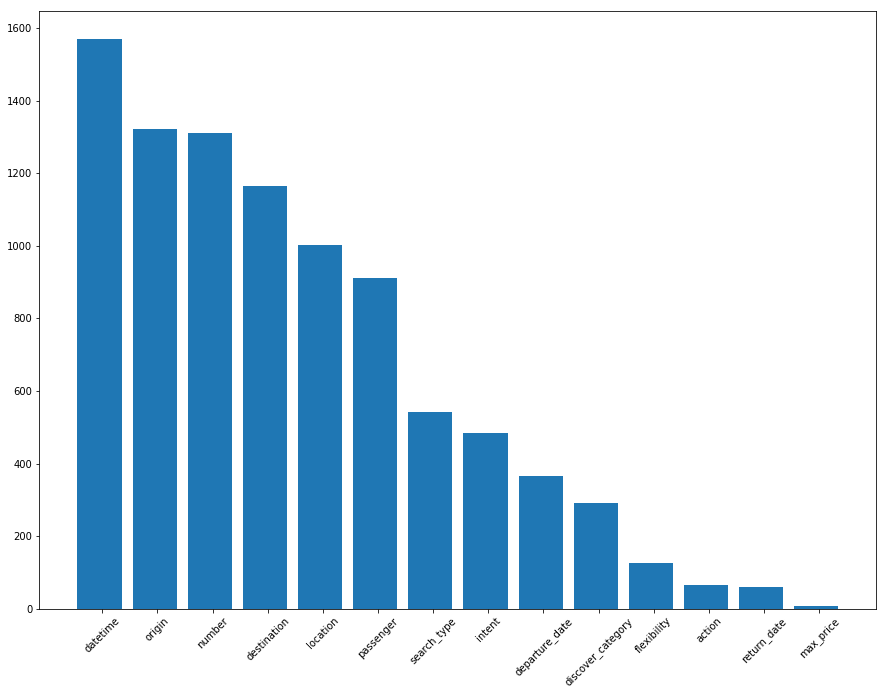

In [21]:
counts2 = dict(Counter(entities_value).most_common())
labels2, values2 = zip(*counts2.items())

# sort your values in descending order
indSort2 = np.argsort(values2)[::-1]

# rearrange your data
labels2 = np.array(labels2)[indSort2]
values2 = np.array(values2)[indSort2]

indexes2 = np.arange(len(labels2))

bar_width = 0.05

plt.figure(figsize=(15,11))
plt.bar(indexes2, values2)

# add labels

plt.xticks(indexes2 + bar_width, labels2, rotation=45)
plt.show()

In [22]:
df11 = pd.DataFrame(labels2, columns=['most common'])
df22 = pd.DataFrame(values2, columns=['occurence'])
df33 = pd.DataFrame(values2/(9220)*100, columns=['% occurence'])
dff = pd.concat([df11,df22,df33], axis=1)

In [23]:
dff

,most common,occurence,% occurence
0,datetime,1570,17.028200
1,origin,1323,14.349241
2,number,1311,14.219089
3,destination,1165,12.635575
4,location,1002,10.867679
5,passenger,912,9.891540
6,search_type,543,5.889371
7,intent,483,5.238612
8,departure_date,366,3.969631
9,discover_category,292,3.167028


In [24]:
df_all['confidence'].describe()

count    9221.000000
mean        0.914804
std         0.145546
min         0.161667
25%         0.906270
50%         0.987352
75%         1.000000
max         1.000000
Name: confidence, dtype: float64

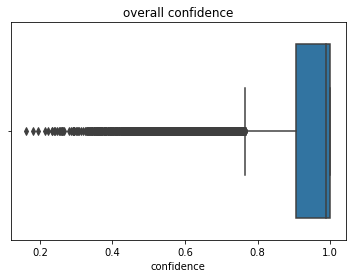

In [25]:
sns.boxplot(df_all['confidence']).set_title('overall confidence')
plt.show()

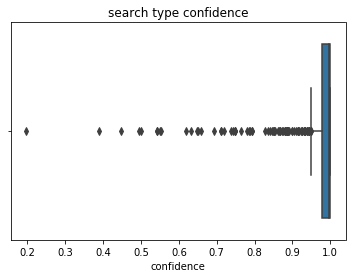

In [26]:
sns.boxplot(df_all[df_all['entity value']=='search_type']['confidence']).set_title('search type confidence')
plt.show()

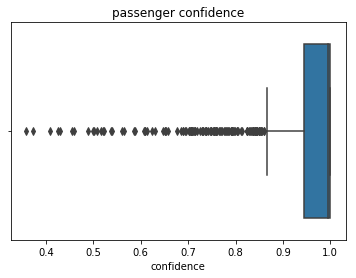

In [27]:
sns.boxplot(df_all[df_all['entity value']=='passenger']['confidence']).set_title('passenger confidence')
plt.show()

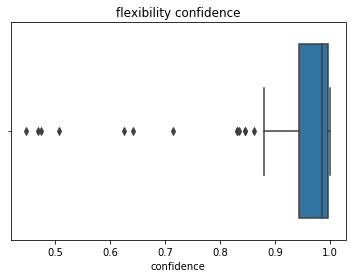

In [28]:
sns.boxplot(df_all[df_all['entity value']=='flexibility']['confidence']).set_title('flexibility confidence')
plt.show()

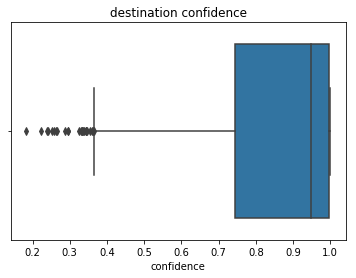

In [29]:
sns.boxplot(df_all[df_all['entity value']=='destination']['confidence']).set_title('destination confidence')
plt.show()

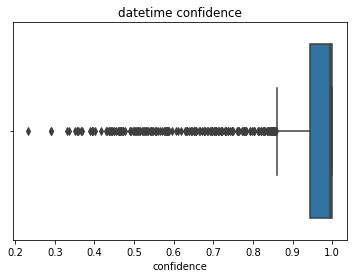

In [30]:
sns.boxplot(df_all[df_all['entity value']=='datetime']['confidence']).set_title('datetime confidence')
plt.show()

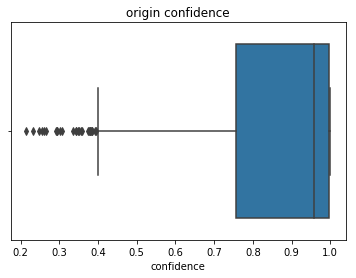

In [31]:
sns.boxplot(df_all[df_all['entity value']=='origin']['confidence']).set_title('origin confidence')
plt.show()

In [39]:
with open('./long_texts.json', 'w', encoding = 'utf-8') as outfile:  
    json.dump(long_texts, outfile, indent = 2, ensure_ascii=False)

In [52]:
with open('./long_texts.json', encoding = 'utf-8') as json_file:  
    data = json.load(json_file)

# writing a json file
j = 0
transformed = {}
transformed['common_examples'] = []
for p in data:
    entites = {}
    entites['entities'] = []
    for elt in p['entities']:
        #print(p['entities'][elt])
        #print('********************')
        #verifier si les parties de elt existent / bon format avant de lancer la transfo #Prague
        if ("start" in p['entities'][elt][0]) and ('value' in p['entities'][elt][0]["value"]):
            
            # destination n' origin
            if ("role" in p['entities'][elt][0]) and(p['entities'][elt][0]["entity"] == "location"):
                entites['entities'].append({
                    "start": p['entities'][elt][0]['start'],
                    "end": p['entities'][elt][0]['end'],
                    "value": str(p['entities'][elt][0]["value"]["value"]),
                    "entity": p['entities'][elt][0]['role']
                    })
                
            # get rid of datetime
            ##if (p['entities'][elt][0]["entity"] == "datetime"):
            ##    print(' ')
                
            # get rid of number
            ##if (p['entities'][elt][0]["entity"] == "number"):
            ##    print(' ')
            
            # nb_passengers
            if (elt == 'passenger'):
                entites['entities'].append({
                    "start": p['entities'][elt][0]['start'],
                    "end": p['entities'][elt][0]['end'],
                    "value": str(p['entities'][elt][0]["value"]["value"]),
                    "entity": 'nb_passengers'
                    })
            
            # flexibility
            if (elt == "flexibility"):
                entites['entities'].append({
                    "start": p['entities'][elt][0]['start'],
                    "end": p['entities'][elt][0]['end'],
                    "value": str(p['entities'][elt][0]["value"]["value"]),
                    "entity": 'flexibility'
                    })
            
            # discover_category
            if (elt == "discover_category"):
                entites['entities'].append({
                    "start": p['entities'][elt][0]['start'],
                    "end": p['entities'][elt][0]['end'],
                    "value": str(p['entities'][elt][0]["value"]["value"]),
                    "entity": 'discover_category'
                    })
            
            # one_way
            if (elt == "search_type") and (p['entities'][elt][0]["value"]["value"] == 'one_way'):
                entites['entities'].append({
                    "start": p['entities'][elt][0]['start'],
                    "end": p['entities'][elt][0]['end'],
                    "value": p['_text'][p['entities'][elt][0]['start']:p['entities'][elt][0]['end']],
                    "entity": 'one_way'
                    })
            
            # round_trip
            if (elt == "search_type") and (p['entities'][elt][0]["value"]["value"] == 'round_trip'):
                entites['entities'].append({
                    "start": p['entities'][elt][0]['start'],
                    "end": p['entities'][elt][0]['end'],
                    "value": p['_text'][p['entities'][elt][0]['start']:p['entities'][elt][0]['end']],
                    "entity": 'round_trip'
                    })
            

    transformed['common_examples'].append({
        'text': p['_text'],
        'intent': 'flight_search',
        'entities': entites['entities']
        })
trans = {'rasa_nlu_data':transformed}
#trans['rasa_nlu_data']['common_examples'] = transformed


i = 0
for e in transformed['common_examples']:
    print(e)
    i += 1
    if i >= 1:
        break

with open('./data.json', 'w', encoding = 'utf-8') as outfile:  
    json.dump(trans, outfile, indent = 2, ensure_ascii=False)

{'text': 'aller simple depuis toulouse pour 1 personne demain', 'intent': 'flight_search', 'entities': [{'start': 0, 'end': 12, 'value': 'aller simple', 'entity': 'one_way'}, {'start': 20, 'end': 28, 'value': 'toulouse', 'entity': 'origin'}, {'start': 34, 'end': 35, 'value': '1', 'entity': 'nb_passengers'}]}


In [53]:
with open('./data.json', encoding = 'utf-8') as json_file:  
    data = json.load(json_file)

datas = data['rasa_nlu_data']['common_examples']
examples = []
j = 0
i = 0
for p in datas:
    if (p['entities'] == []):
        j += 1
    else:
        examples.append(p)
        i += 1
print(j)
print(i)
transformed = {'common_examples':examples}
final_longs = {'rasa_nlu_data':transformed}

with open('./long_texts_transformed.json', 'w', encoding = 'utf-8') as outfile:  
    json.dump(final_longs, outfile, indent = 2, ensure_ascii=False)
        


1601
2170


In [46]:
'start' in data[0]['entities']['origin'][0]

True

11.313708498984761